# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [87]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib as plt
DFdata = os.getenv('DFDATA')
%matplotlib inline

In [46]:
# Load dataset
df = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv', usecols=['Agency Name', 'Complaint Type', 'Descriptor',
       'Resolution Description',
      'Community Board', 'Borough'])

df.head()

,Agency Name,Complaint Type,Descriptor,Resolution Description,Community Board,Borough
0,New York City Police Department,Noise - Residential,Loud Talking,Your complaint has been received by the Police...,04 BROOKLYN,BROOKLYN
1,New York City Police Department,Noise - Residential,Loud Music/Party,Your complaint has been received by the Police...,17 BROOKLYN,BROOKLYN
2,New York City Police Department,Noise - Residential,Loud Music/Party,The Police Department responded to the complai...,12 MANHATTAN,MANHATTAN
3,New York City Police Department,Noise - Residential,Loud Music/Party,Your complaint has been received by the Police...,03 BRONX,BRONX
4,New York City Police Department,Noise - Commercial,Loud Music/Party,Your complaint has been received by the Police...,10 BRONX,BRONX


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [41]:
# Check if all Boroughs and Community Districts are represented in the Data 
print(df['Community Board'].unique())

['04 BROOKLYN' '17 BROOKLYN' '12 MANHATTAN' '03 BRONX' '10 BRONX'
 '01 BRONX' '07 BRONX' '04 BRONX' '01 BROOKLYN' '12 BRONX' '11 BRONX'
 '07 MANHATTAN' '06 MANHATTAN' '13 BROOKLYN' '07 QUEENS' '02 QUEENS'
 '02 BRONX' '08 BROOKLYN' '11 BROOKLYN' '03 MANHATTAN' '02 BROOKLYN'
 '01 QUEENS' '04 MANHATTAN' '14 BROOKLYN' '09 MANHATTAN' '06 BROOKLYN'
 '08 MANHATTAN' '18 BROOKLYN' '11 MANHATTAN' '03 BROOKLYN' '04 QUEENS'
 '06 QUEENS' '09 BROOKLYN' '12 QUEENS' '05 BRONX' '05 BROOKLYN'
 '10 MANHATTAN' '11 QUEENS' '09 QUEENS' '02 MANHATTAN' '08 BRONX'
 '10 QUEENS' '01 STATEN ISLAND' '03 QUEENS' '07 BROOKLYN'
 '02 STATEN ISLAND' '06 BRONX' '05 QUEENS' '09 BRONX' '14 QUEENS'
 '12 BROOKLYN' '05 MANHATTAN' '15 BROOKLYN' '13 QUEENS' '03 STATEN ISLAND'
 '01 MANHATTAN' '08 QUEENS' '10 BROOKLYN' '0 Unspecified' '16 BROOKLYN'
 'Unspecified BROOKLYN']
There are 61 unique entries


All 59 Districts are present, plus an additional 2 'unspecified' districts, making 61 total.

In [42]:
# How many unique values do we have? 
print('There are ' + str(df['Community Board'].unique().size) + ' unique entries')

There are 61 unique entries


In [6]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

We have additional districts because some entries were unable to be narrowed down by borough or district and were thus left 'unspecified'

In [47]:
# Check for duplicates? Are these plausible?
print(df.shape)
print(df.drop_duplicates().shape)

(1000, 6)
(551, 6)


We see that of our sample of the 311 calls, nearly half match along the 6 columns of interest, which is not unusual since this just requires that the complaint, resolution and community district match up.

In [48]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?
df["Resolution Description"].fillna(df["Complaint Type"], inplace=True)

In [55]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 
df['Marker'] = df['Community Board'].str.contains('Unspecified', case=False)


We remove any entry with a community district listed as 'unspecified'.

In [56]:
# Drop the marked districts
df = df[df['Marker'] == False]
df.head()

,Agency Name,Complaint Type,Descriptor,Resolution Description,Community Board,Borough,Marker
0,New York City Police Department,Noise - Residential,Loud Talking,Your complaint has been received by the Police...,04 BROOKLYN,BROOKLYN,False
1,New York City Police Department,Noise - Residential,Loud Music/Party,Your complaint has been received by the Police...,17 BROOKLYN,BROOKLYN,False
2,New York City Police Department,Noise - Residential,Loud Music/Party,The Police Department responded to the complai...,12 MANHATTAN,MANHATTAN,False
3,New York City Police Department,Noise - Residential,Loud Music/Party,Your complaint has been received by the Police...,03 BRONX,BRONX,False
4,New York City Police Department,Noise - Commercial,Loud Music/Party,Your complaint has been received by the Police...,10 BRONX,BRONX,False


In [70]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
df_311 = pd.DataFrame(df["Complaint Type"].groupby(df["Community Board"]).count()).sort(columns='Complaint Type', ascending=False).reset_index().reset_index()
df_311 = df_311.rename(index=str, columns={"index": "Complaint Ranking", "Complaint Type": "Number of Complaints"})
df_311['Complaint Ranking'] = df_311['Complaint Ranking'] + 1
df_311.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Complaint Ranking,Community Board,Number of Complaints
0,1,12 MANHATTAN,70
1,2,03 MANHATTAN,48
2,3,05 QUEENS,36
3,4,04 BROOKLYN,34
4,5,01 BROOKLYN,32


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [14]:
# Population by Community District
df_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")
df_pop = df_pop[["cd_id", "Total Population", "Population Density (per sq. mile)", '% Population 5 Years And Over: Speak Only English',
                '% Population 5 Years And Over: Spanish or Spanish Creole', '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
                "Population 25 Years and over: Master's degree or more", 'Median household income (In 2014 Inflation Adjusted Dollars)',
                'Per capita income (In 2014 Inflation Adjusted Dollars)']]
df_pop.head()

,cd_id,Total Population,Population Density (per sq. mile),% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well""",Population 25 Years and over: Master's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
0,BX08,106737,31229.95006,46.80,39.24,15.24,13421,54224,30730
1,BX12,134644,19966.67839,73.09,18.19,6.07,5466,44906,21523
2,BX10,121209,12913.81703,61.79,26.43,6.92,8959,54962,28586
3,BX11,135839,35677.95453,43.22,36.45,13.66,10174,47910,22714
4,BX03,172247,39405.79222,36.82,54.24,24.14,3781,22041,12662


In [15]:
# Check variables in file
df_pop.columns

Index(['cd_id', 'Total Population', 'Population Density (per sq. mile)',
       '% Population 5 Years And Over: Speak Only English',
       '% Population 5 Years And Over: Spanish or Spanish Creole',
       '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
       'Population 25 Years and over: Master's degree or more',
       'Median household income (In 2014 Inflation Adjusted Dollars)',
       'Per capita income (In 2014 Inflation Adjusted Dollars)'],
      dtype='object')

In [16]:
# How many community districts are in file? 
df_pop.cd_id.describe()

count       59
unique      59
top       BX11
freq         1
Name: cd_id, dtype: object

There are exactly 59 community districts in the file.

In [71]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
df_pop = df_pop.sort_values(by='% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"')
df_pop.head()

,Community Board,Total Population,Population Density (per sq. mile),% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well""",Population 25 Years and over: Master's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
17,MN07,192374,65024.96109,73.38,6.42,1.06,70490,106181,94856
19,MN04,149447,48626.99095,73.93,5.37,1.11,40322,98561,87756
20,MN06,143349,87333.79104,78.30,4.53,1.13,45406,105625,90557
14,MN10,132027,91244.88989,74.19,6.94,1.88,15679,40564,32585
32,BK08,126747,57010.54356,80.23,5.63,2.03,12476,44904,25917


In [97]:
# Infrastructure by Community District
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [20]:
# Check variables in file
df_infr.columns

Index(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [21]:
# How many community districts are in file? 
df_infr['Qualifying Name'].describe()

count                                                    59
unique                                                   55
top       NYC-Bronx Community District 1 & 2--Hunts Poin...
freq                                                      2
Name: Qualifying Name, dtype: object

There are 59 entries for community districts, but a few of them are like 'NYC-Bronx Community District 3 & 6', are aggregated and listed twice for some reason.

In [22]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
df_infr['All mobile'] = df_infr['Households: With Mobile Broadband'] + \
                        df_infr['Households: With Mobile Broadband.1'] + \
                        df_infr['Households: With Mobile Broadband.2'] + \
                        df_infr['Households: With Mobile Broadband.3'] + \
                        df_infr['Households: With Mobile Broadband.4']
df_infr['All mobile'].head()

0    15359
1    10486
2    11425
3    10748
4    14907
Name: All mobile, dtype: int64

In [23]:
# Aggregate internet type by high and low connections
df_infr['High Internet Connection'] = df_infr['Households: Fiber-Optic'] + \
                                    df_infr['Households: Cable Modem'] + \
                                    df_infr['All mobile']
                                    
        
df_infr['Low Internet Connection'] = df_infr['Households: Dial-Up Alone'] + \
                                    df_infr['Households: Dsl'] + \
                                    df_infr['Households: Two or More Fixed Broadband Types, or Other'] + \
                                    df_infr['Households: Satellite Internet Service'] + \
                                    df_infr['Households: Internet Access Without A Subscription']

In [24]:
# Save data frame 
df_infr = df_infr[['Qualifying Name', 'High Internet Connection', 'Low Internet Connection']]
df_infr.head()

,Qualifying Name,High Internet Connection,Low Internet Connection
0,"NYC-Bronx Community District 8--Riverdale, New...",35476,11629
1,"NYC-Bronx Community District 12--Wakefield, Ne...",35355,8337
2,"NYC-Bronx Community District 10--Co-op City, N...",34959,11438
3,NYC-Bronx Community District 11--Pelham Parkwa...,34100,10372
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",32264,20073


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

#### Harmonize identifier of dataframe 1

In [81]:
df_311['Community Board'] = df_311['Community Board'].replace(to_replace=' BRONX', value='BX', regex = True)
df_311['Community Board'] = df_311['Community Board'].replace(to_replace=' MANHATTAN', value='MN', regex = True)
df_311['Community Board'] = df_311['Community Board'].replace(to_replace=' STATEN ISLAND', value='SI', regex = True)
df_311['Community Board'] = df_311['Community Board'].replace(to_replace=' BROOKLYN', value='BK', regex = True)
df_311['Community Board'] = df_311['Community Board'].replace(to_replace=' QUEENS', value='QN', regex = True)
df_311['Community Board'] = df_311['Community Board'].str[2:4] + df_311['Community Board'].str[:2]
df_311.head()

,Complaint Ranking,Community Board,Number of Complaints
0,1,MN12,70
1,2,MN03,48
2,3,QN05,36
3,4,BK04,34
4,5,BK01,32


#### Harmonize identifier of dataframe 2

In [26]:
df_pop = df_pop.rename(index=str, columns={"cd_id": "Community Board"})
df_pop['Community Board'] = df_pop['Community Board'].str[:4]
df_pop.head()

,Community Board,Total Population,Population Density (per sq. mile),% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well""",Population 25 Years and over: Master's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
17,MN07,192374,65024.96109,73.38,6.42,1.06,70490,106181,94856
19,MN04,149447,48626.99095,73.93,5.37,1.11,40322,98561,87756
20,MN06,143349,87333.79104,78.30,4.53,1.13,45406,105625,90557
14,MN10,132027,91244.88989,74.19,6.94,1.88,15679,40564,32585
32,BK08,126747,57010.54356,80.23,5.63,2.03,12476,44904,25917


#### Harmonize identifier of dataframe 3

In [27]:
#Remove left excess info on left side of Name
df_infr['Qualifying Name'] = df_infr['Qualifying Name'].replace(to_replace=' BRONX', value='BX', regex = True)
df_infr['Qualifying Name'] = df_infr['Qualifying Name'].replace(to_replace=' MANHATTAN', value='MN', regex = True)
df_infr['Qualifying Name'] = df_infr['Qualifying Name'].replace(to_replace=' STATEN ISLAND', value='SI', regex = True)
df_infr['Qualifying Name'] = df_infr['Qualifying Name'].replace(to_replace=' BROOKLYN', value='BK', regex = True)
df_infr['Qualifying Name'] = df_infr['Qualifying Name'].replace(to_replace=' QUEENS', value='QN', regex = True)

#Resolve aggregation of districts
df_infr['Qualifying Name'][4] = 'BX03'
df_infr['Qualifying Name'][5] = 'BX06'
df_infr['Qualifying Name'][10] = 'BX01'
df_infr['Qualifying Name'][11] = 'BX02'
df_infr['Qualifying Name'][18] = 'MN04'
df_infr['Qualifying Name'][19] = 'MN05'
df_infr['Qualifying Name'][22] = 'MN01'
df_infr['Qualifying Name'][23] = 'MN02'

#Change BX9 to BX09, etc.
df_infr['Qualifying Name'][df_infr['Qualifying Name'].str[3:4] == '-'] = df_infr['Qualifying Name'][df_infr['Qualifying Name'].str[3:4] == '-'].str[0:2] + \
                                                                        '0' + df_infr['Qualifying Name'][df_infr['Qualifying Name'].str[3:4] == '-'].str[2:3]
df_infr['Qualifying Name'] = df_infr['Qualifying Name'].str[:4]
    
df_infr = df_infr.rename(index=str, columns={"Qualifying Name": "Community Board"})    
    
df_infr.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packa

,Community Board,High Internet Connection,Low Internet Connection
0,BX08,35476,11629
1,BX12,35355,8337
2,BX10,34959,11438
3,BX11,34100,10372
4,BX03,32264,20073


#### Link the 3 dataframes

In [84]:
df_merged = df_311.merge(df_pop, on='Community Board').merge(df_infr, on='Community Board')
df_merged.head()

,Complaint Ranking,Community Board,Number of Complaints,Total Population,Population Density (per sq. mile),% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well""",Population 25 Years and over: Master's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars),High Internet Connection,Low Internet Connection
0,1,MN12,70,224365,75217.43287,68.39,18.39,7.16,19577,45157,21969,62869,13654
1,2,MN03,48,152453,87256.67015,63.29,6.74,2.31,20357,41366,39101,52967,14799
2,3,QN05,36,168488,23005.32298,68.93,18.09,9.12,9969,63660,28288,49936,7549
3,4,BK04,34,137368,54279.76123,78.17,9.87,3.57,5126,40484,20052,32431,6456
4,5,BK01,32,154713,37671.51058,72.48,15.53,5.71,17028,57818,34897,56123,10914


#### Are the demographics and infrastructure different in Community Districts that show more complaints than others?


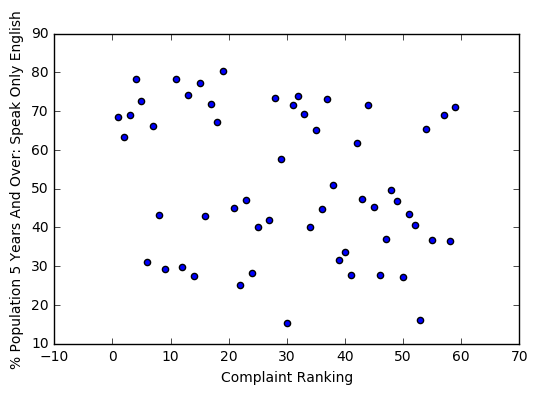

In [93]:
df_merged.plot('Complaint Ranking', '% Population 5 Years And Over: Speak Only English', kind = 'scatter')

#### Figure 1: A scatter plot of a NYC district's ranking in number of 311 complaints and the percentage of individuals who speak only English in the district. There does not appear to be a strong correlation between the two.

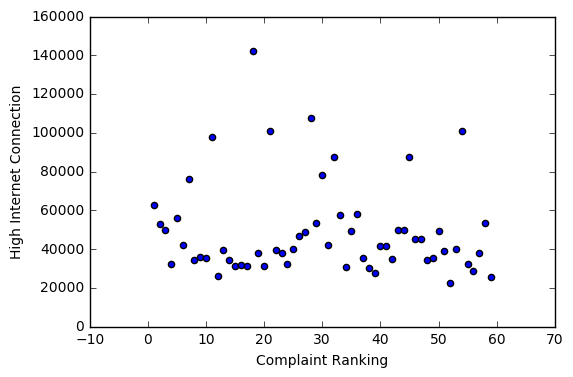

In [96]:
df_merged.plot('Complaint Ranking', 'High Internet Connection', kind = 'scatter')

#### Figure 4: A scatter plot of a NYC district's ranking in number of 311 complaints and the number of household with high speed internet connection in the district. There appears to be a slight negative correlation between the two, possibly indicating that households with limited internet access are less likely to file 311 complaints.